In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
with open('evid_elbo_dict.pkl', 'rb') as f:
    evid_elbo_dict = pickle.load(f)

In [3]:

# Extract the keys and values
keys = list(evid_elbo_dict.keys())
diff_arr = {}

for key in keys:
    diff_arr[key] = np.array(evid_elbo_dict[key]['evid']) - np.array(evid_elbo_dict[key]['elbo'])




Text(0.5, 1.0, '5 iters: (Evidence - ELBO) mean and std err')

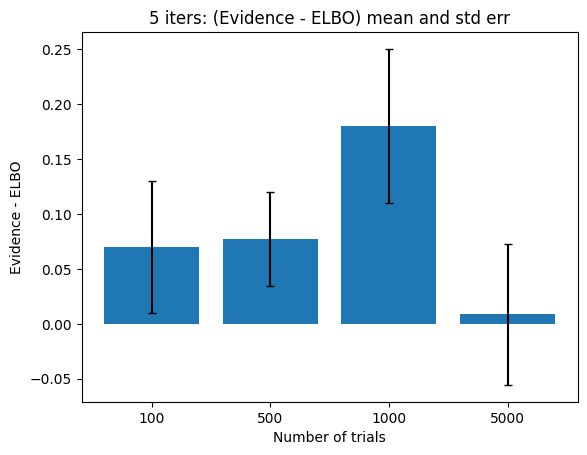

In [4]:
bar_x = [str(x) for x in keys]
means = [np.mean(diff_arr[x]) for x in keys]
stds = [np.std(diff_arr[x])/np.sqrt(len(diff_arr[x])) for x in keys]


fig, ax = plt.subplots()
ax.bar(bar_x, means, yerr=stds, capsize=3)
ax.set_ylabel('Evidence - ELBO')
ax.set_xlabel('Number of trials')
ax.set_title('5 iters: (Evidence - ELBO) mean and std err')

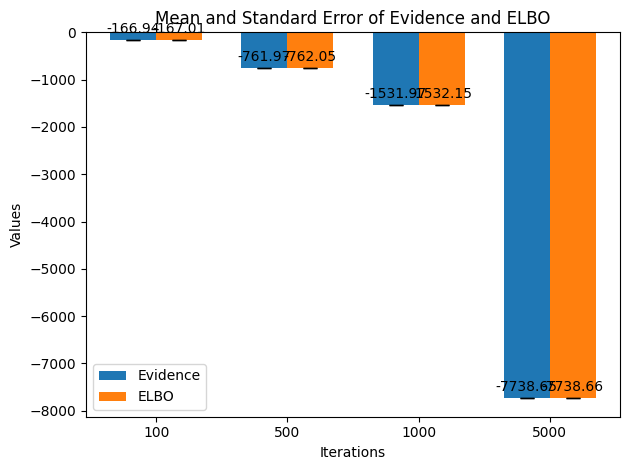

In [5]:

# Extract the keys and values
keys = list(evid_elbo_dict.keys())
evid_values = [evid_elbo_dict[key]['evid'] for key in keys]
elbo_values = [evid_elbo_dict[key]['elbo'] for key in keys]

# Calculate means and standard errors
evid_means = [np.mean(values) for values in evid_values]
elbo_means = [np.mean(values) for values in elbo_values]
evid_errors = [np.std(values, ddof=1) / np.sqrt(len(values)) for values in evid_values]
elbo_errors = [np.std(values, ddof=1) / np.sqrt(len(values)) for values in elbo_values]

# Plotting
x = np.arange(len(keys))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, evid_means, width, yerr=evid_errors, label='Evidence', capsize=5)
rects2 = ax.bar(x + width/2, elbo_means, width, yerr=elbo_errors, label='ELBO', capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
ax.set_title('Mean and Standard Error of Evidence and ELBO')
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()

# Function to add labels on bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [8]:
print(evid_errors)
print(elbo_errors)

[0.06538767564612809, 0.047069367756372445, 0.06706035604376243, 0.07520718397970376]
[0.017679208064272978, 0.0013045860543366308, 0.12630078223748903, 0.012716415228632021]


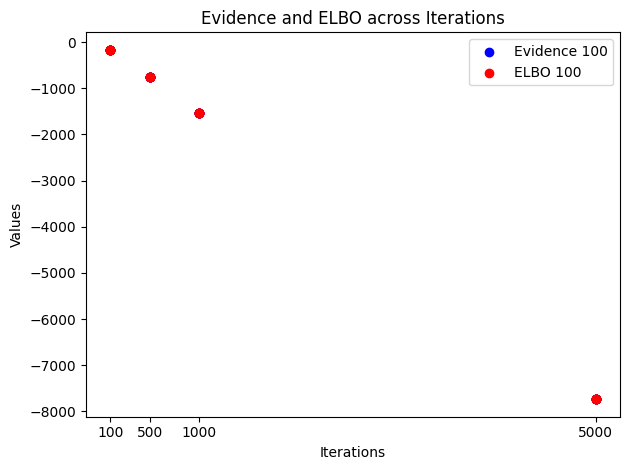

In [9]:

# Extract the keys and values
keys = list(evid_elbo_dict.keys())
evid_values = [evid_elbo_dict[key]['evid'] for key in keys]
elbo_values = [evid_elbo_dict[key]['elbo'] for key in keys]

# Plotting
fig, ax = plt.subplots()

# Plot each iteration's values as individual points
for i, key in enumerate(keys):
    x_vals = np.full(5, key)  # Create an array of the same key for plotting
    ax.scatter(x_vals - 0.1, evid_values[i], label=f'Evidence {key}' if i == 0 else "", color='blue')
    ax.scatter(x_vals + 0.1, elbo_values[i], label=f'ELBO {key}' if i == 0 else "", color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
ax.set_title('Evidence and ELBO across Iterations')
ax.set_xticks(keys)
ax.legend()

fig.tight_layout()
plt.show()


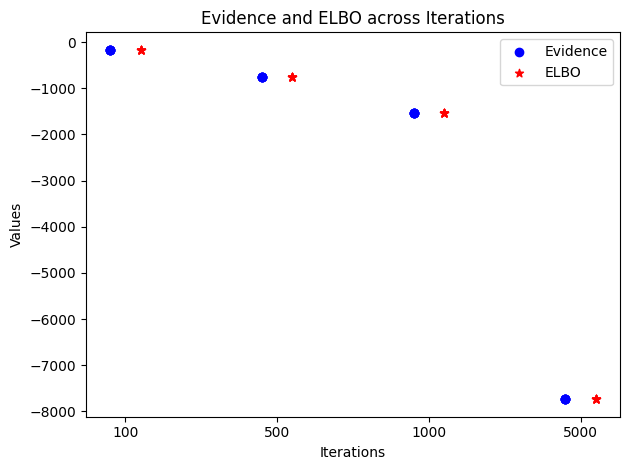

In [10]:


# Extract the keys and values
keys = list(evid_elbo_dict.keys())
evid_values = [evid_elbo_dict[key]['evid'] for key in keys]
elbo_values = [evid_elbo_dict[key]['elbo'] for key in keys]

# Plotting
fig, ax = plt.subplots()

# Plot each iteration's values as individual points with different markers
for i, key in enumerate(keys):
    x_vals = np.full(5, i)  # Create an array of the same key index for plotting
    ax.scatter(x_vals - 0.1, evid_values[i], label='Evidence' if i == 0 else "", color='blue', marker='o')
    ax.scatter(x_vals + 0.1, elbo_values[i], label='ELBO' if i == 0 else "", color='red', marker='*')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
ax.set_title('Evidence and ELBO across Iterations')
ax.set_xticks(range(len(keys)))
ax.set_xticklabels(keys)
ax.legend()

fig.tight_layout()
plt.show()


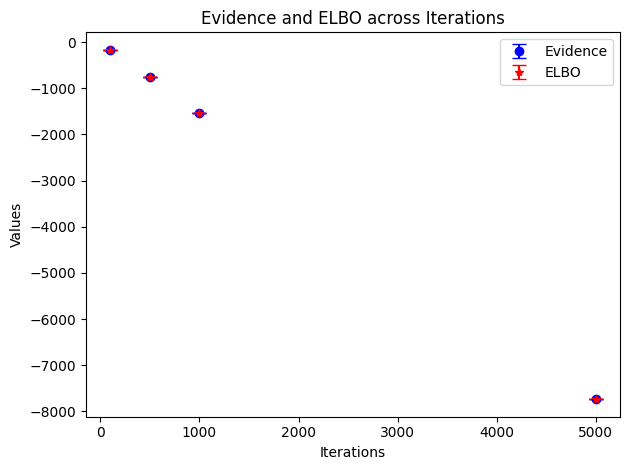

In [11]:

# Extract the keys and values
keys = list(evid_elbo_dict.keys())
evid_values = [evid_elbo_dict[key]['evid'] for key in keys]
elbo_values = [evid_elbo_dict[key]['elbo'] for key in keys]

# Calculate means and standard errors
evid_means = [np.mean(values) for values in evid_values]
elbo_means = [np.mean(values) for values in elbo_values]
evid_errors = [np.std(values, ddof=1) / np.sqrt(len(values)) for values in evid_values]
elbo_errors = [np.std(values, ddof=1) / np.sqrt(len(values)) for values in elbo_values]

# Plotting
fig, ax = plt.subplots()

# Plot Evidence with error bars
ax.errorbar(keys, evid_means, yerr=evid_errors, fmt='o', color='blue', label='Evidence', capsize=5)

# Plot ELBO with error bars
ax.errorbar(keys, elbo_means, yerr=elbo_errors, fmt='*', color='red', label='ELBO', capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
ax.set_title('Evidence and ELBO across Iterations')
ax.legend()

fig.tight_layout()
plt.show()


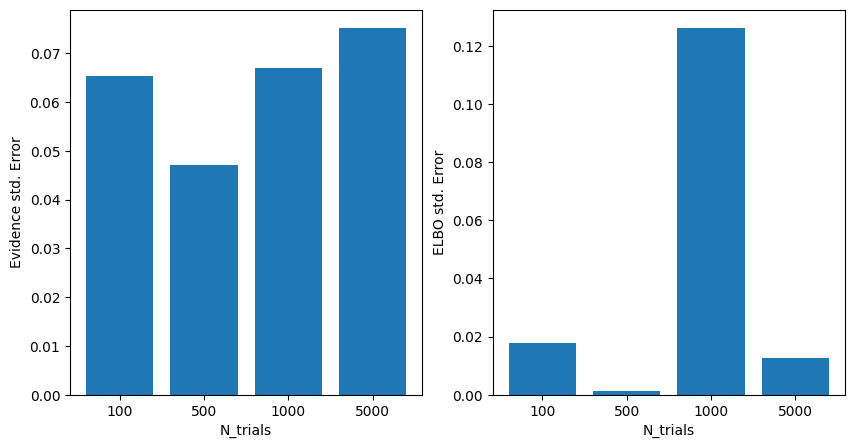

In [14]:
N_trials = [100, 500, 1000, 5000]
plt.figure(figsize=(10,5));
plt.subplot(1,2,1)
plt.bar([str(x) for x in N_trials],evid_errors);
plt.xlabel('N_trials');plt.ylabel('Evidence std. Error');

plt.subplot(1,2,2)
plt.bar([str(x) for x in N_trials],elbo_errors);
plt.xlabel('N_trials');plt.ylabel('ELBO std. Error');